In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.metrics import classification_report,confusion_matrix


from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


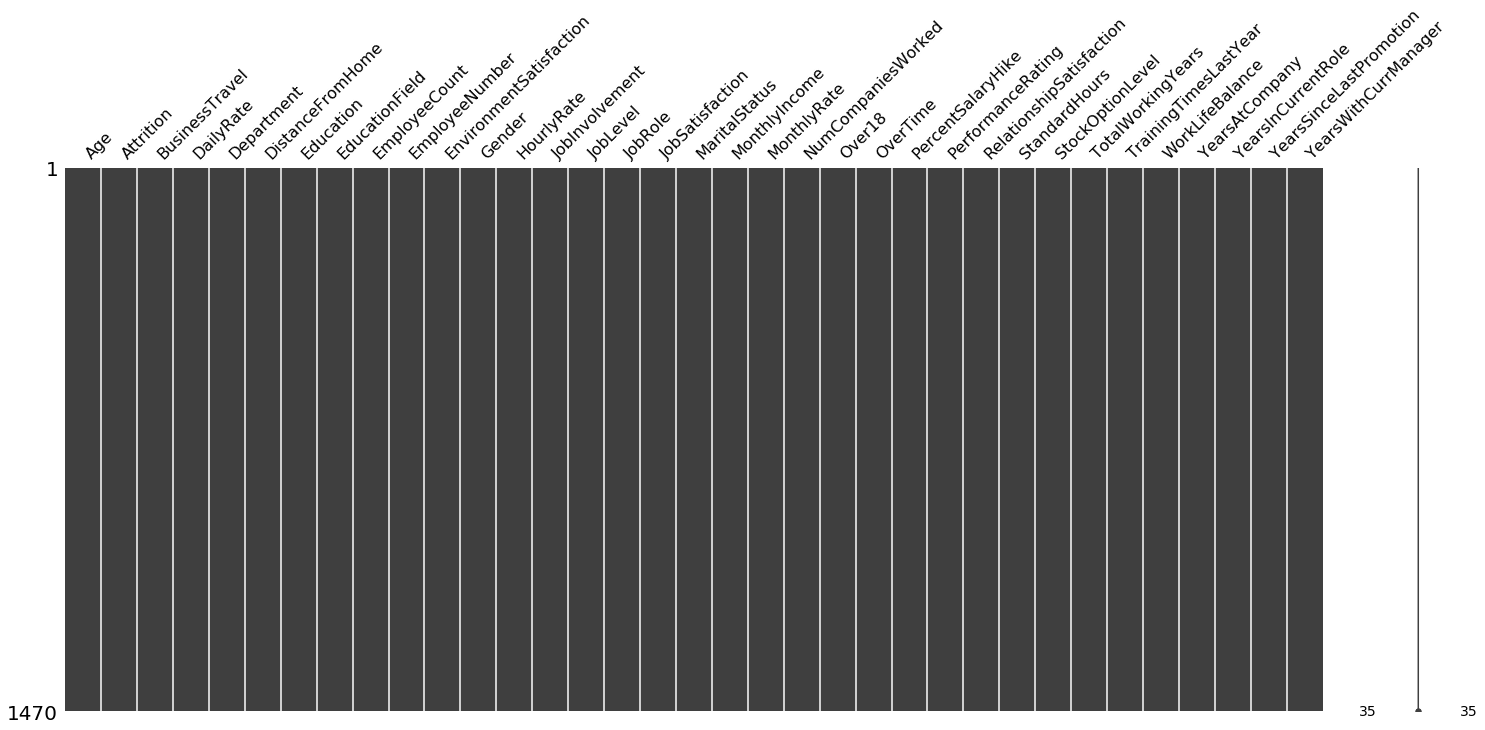

In [4]:
missingno.matrix(df)

In [5]:
df.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

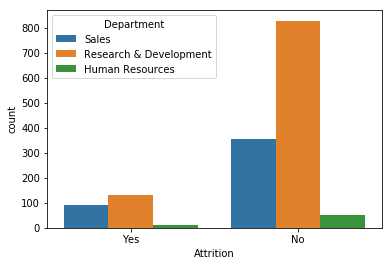

In [8]:
sns.countplot(x='Attrition',data=df,hue='Department')

In [9]:
corr = df.corr()

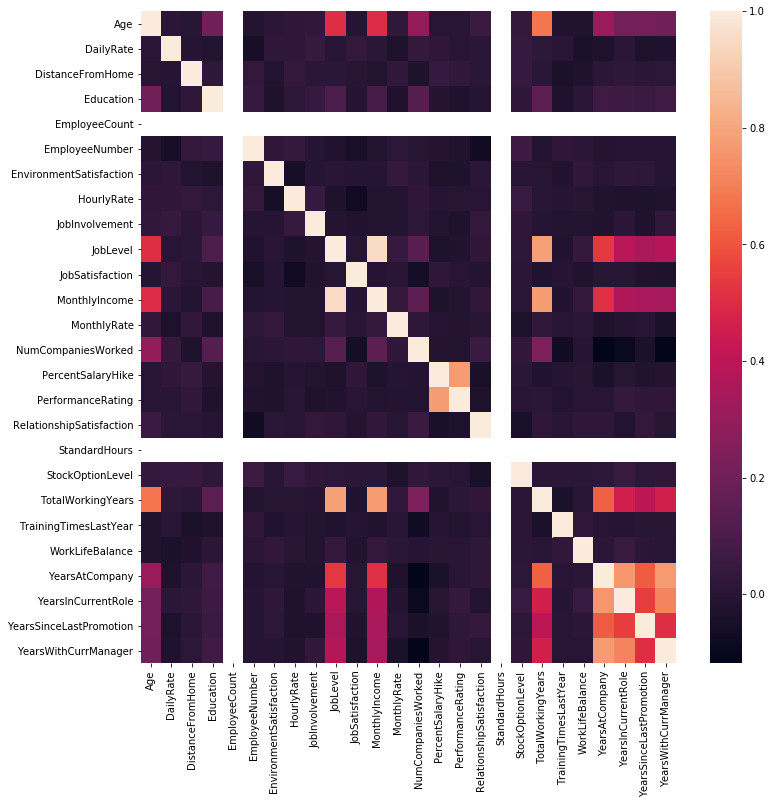

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(corr)

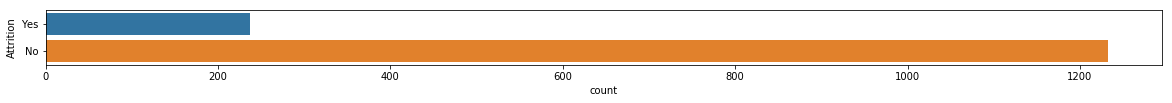

In [11]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Attrition', data=df);

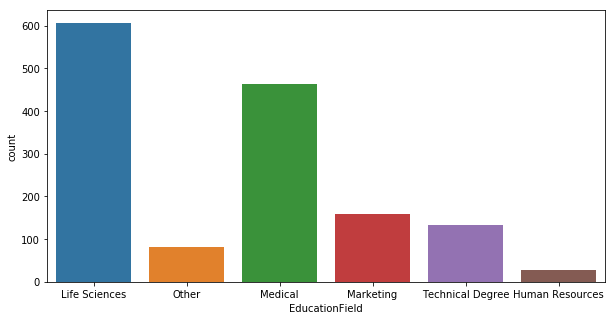

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EducationField', data=df);

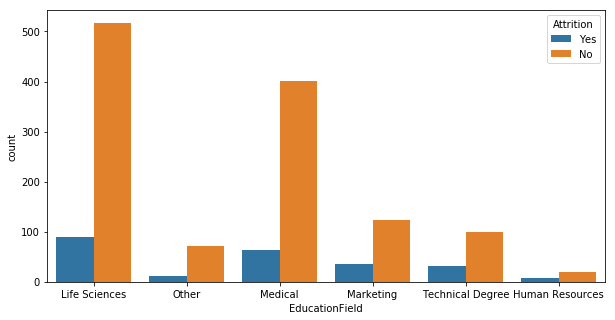

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EducationField', data=df,hue='Attrition');

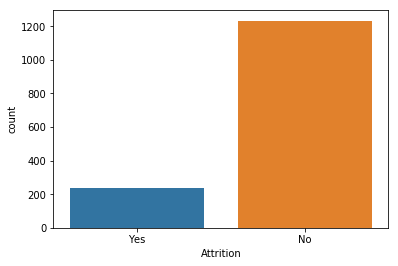

In [14]:
sns.countplot(df['Attrition'])

In [15]:
df_feat = pd.DataFrame()

Y = df['Attrition']

df_feat['Age'] = df['Age']

df_feat['JobLevel'] = df['JobLevel']

df_feat['MonthlyIncome'] = df['MonthlyIncome']

df_feat['PercentSalaryHike'] = df['PercentSalaryHike']

df_feat['TotalWorkingYears'] = df['TotalWorkingYears']

df_feat['YearsAtCompnay'] = df['YearsAtCompany']

df_feat['YearsInCurrentRole'] = df['YearsInCurrentRole']

df_feat['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion']

df_feat['YearsWithCurrManager'] = df['YearsWithCurrManager']

x = df_feat

In [16]:
x.head()

,Age,JobLevel,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompnay,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,5993,11,8,6,4,0,5
1,49,2,5130,23,10,10,7,1,7
2,37,1,2090,15,7,0,0,0,0
3,33,1,2909,11,8,8,7,3,0
4,27,1,3468,12,6,2,2,2,2


In [17]:
one_hot = OneHotEncoder()
le = preprocessing.LabelEncoder()

# Feature-Selection

In [18]:
x['Age'] = le.fit_transform(x['Age'])

x['JobLevel'] = le.fit_transform(x['JobLevel'])

x['MonthlyIncome'] = le.fit_transform(x['MonthlyIncome'])

x['PercentSalaryHike'] = le.fit_transform(x['PercentSalaryHike'])

x['TotalWorkingYears'] = le.fit_transform(x['TotalWorkingYears'])

x['YearsAtCompnay'] = le.fit_transform(x['YearsAtCompnay'])

x['YearsInCurrentRole'] = le.fit_transform(x['YearsInCurrentRole'])

x['YearsSinceLastPromotion'] = le.fit_transform(x['YearsSinceLastPromotion'])

x['YearsWithCurrManager'] = le.fit_transform(x['YearsWithCurrManager'])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size=0.3, random_state=101)

In [41]:
class models():
    
    

    def __init__(self,x_train,y_train,x_test,y_test):
    
        self.x_train = x_train

#         self.x_test = x_test

        self.y_train = y_train

#         self.y_test = y_test
        
    
#         self.error_rate = [ ]


    def logistic_model(self,x_test):  
    
    
            log_model = RFECV(LogisticRegression(solver='lbfgs',tol=0.1,max_iter=4000,random_state=101), scoring='accuracy')

            log_model.fit(self.x_train,self.y_train)

            logistic_score = log_model.score(self.x_train,self.y_train)

            log_predictions = log_model.predict(x_test)

#             confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predictions))  

            return log_predictions,logistic_score

    def Random_forest_classifier(self,x_test):
        
        
        RF_Model = RFECV(RandomForestClassifier(n_estimators=100), scoring='accuracy')
        
        RF_Model.fit(self.x_train,self.y_train)
        
        RF_score = RF_Model.score(self.x_train,self.y_train)
        
        RF_predictions = RF_Model.predict(x_test)
        
        return RF_predictions,RF_score
    
    def KNN(self,x_test):
        
        KNN = KNeighborsClassifier(n_neighbors=5)
        
        KNN.fit(self.x_train,self.y_train)
        
        KNN_predictions = KNN.predict(x_test)
        
        KNN_score = KNN.score(self.x_train,self.y_train)
        
        return KNN_predictions,KNN_score
    
    def elbow_method(self,x_test,y_test):

        for i in range(1,40):
            
            error_rate = []

            knn= KNeighborsClassifier(n_neighbors=i)

            knn.fit(self.x_train,self.y_train)

            pred_i = knn.predict(x_test)

            error_rate.append(np.mean(pred_i!=y_test))

            return error_rate
    
    def graph_plot_elbow(self,error_rate):
        
        plt.figure(figsize=(10,6))
        plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
        plt.title('error rate vs K value')
        plt.xlabel('K-values')
        plt.ylabel('Error rate')

    

In [21]:
obj = models(x_train,y_train,x_test,y_test)

In [22]:
log_model_prediction,log_score = obj.logistic_model(x_test)

C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [23]:
RF_model_prediction,RF_score = obj.Random_forest_classifier(x_test)

C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
KNN_model_prediction,KNN_score = obj.KNN(x_test)

In [25]:
KNN_score

0.8483965014577259

In [26]:
RF_score

1.0

In [27]:
log_score

0.8377065111758989

# Confusion-Matrix and Classification Report for RandomForestClassifier

In [28]:
print(confusion_matrix(y_test,RF_model_prediction))     

[[350  21]
 [ 58  12]]


In [29]:
print(classification_report(y_test,RF_model_prediction))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90       371
         Yes       0.36      0.17      0.23        70

   micro avg       0.82      0.82      0.82       441
   macro avg       0.61      0.56      0.57       441
weighted avg       0.78      0.82      0.79       441



# Confusion-Matrix and Classification Report for LogisticModel

In [30]:
print(confusion_matrix(y_test,log_model_prediction))     

[[371   0]
 [ 70   0]]


In [31]:
print(classification_report(y_test,log_model_prediction))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       371
         Yes       0.00      0.00      0.00        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LJ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Confusion-Matrix and Classification Report for K-Nearest Neighbour

In [32]:
print(confusion_matrix(y_test,KNN_model_prediction))     

[[346  25]
 [ 58  12]]


In [33]:
print(classification_report(y_test,KNN_model_prediction))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       371
         Yes       0.32      0.17      0.22        70

   micro avg       0.81      0.81      0.81       441
   macro avg       0.59      0.55      0.56       441
weighted avg       0.77      0.81      0.79       441



In [44]:
error_rate = obj.elbow_method(x_test,y_test)